<a href="https://colab.research.google.com/github/vidhya2324/Neutral_network/blob/main/Face_Mask_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


#Import Dataset and process

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 91% 148M/163M [00:00<00:00, 175MB/s]
100% 163M/163M [00:00<00:00, 173MB/s]


In [4]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: data/with

In [5]:
!ls

data  sample_data


In [6]:
#import the neccessary libraries
import os  #access the all the folder and here pandas is not neccessary , so we not import that one
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 #image processing
from google.colab.patches import cv2_imshow
from PIL import Image #pillow is used for read the image
from sklearn.model_selection import train_test_split

In [7]:
with_mask=os.listdir('/content/data/with_mask')
without_mask=os.listdir('/content/data/without_mask')
print(with_mask[0:5])
print(with_mask[-5:])
print(without_mask[0:5])
print(without_mask[-5:])

['with_mask_3329.jpg', 'with_mask_1848.jpg', 'with_mask_1909.jpg', 'with_mask_496.jpg', 'with_mask_518.jpg']
['with_mask_1487.jpg', 'with_mask_786.jpg', 'with_mask_1263.jpg', 'with_mask_1045.jpg', 'with_mask_3461.jpg']
['without_mask_3554.jpg', 'without_mask_2780.jpg', 'without_mask_3030.jpg', 'without_mask_847.jpg', 'without_mask_2721.jpg']
['without_mask_2776.jpg', 'without_mask_3467.jpg', 'without_mask_2082.jpg', 'without_mask_2028.jpg', 'without_mask_903.jpg']


In [8]:
print("Number of with mask: ",len(with_mask))
print("Number of without mask: ",len(without_mask))

Number of with mask:  3725
Number of without mask:  3828


#creat the label for the set this one with two classes

with_mask-->1

without_mask-->0

In [9]:
with_mask_label=[1]*3725
without_mask_label=[0]*3828


In [10]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [12]:
#combine these two label

labels=with_mask_label+without_mask_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

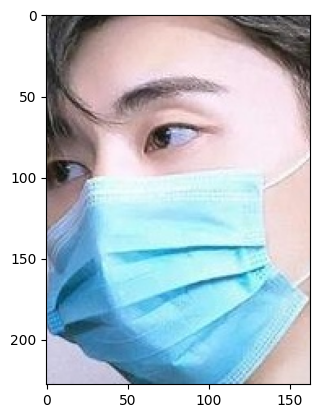

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

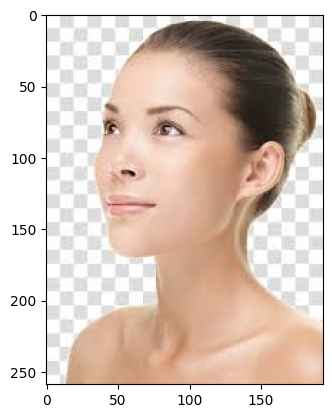

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
len(data)

7553

In [18]:
type(data)

list

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
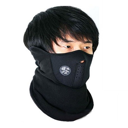

In [19]:
data[0]


In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[207, 232, 252],
        [206, 231, 251],
        [206, 231, 251],
        ...,
        [100, 113,  75],
        [ 36,  48,  10],
        [ 37,  49,  11]],

       [[207, 232, 252],
        [207, 232, 252],
        [207, 232, 252],
        ...,
        [ 96, 108,  69],
        [ 38,  50,  11],
        [ 56,  68,  29]],

       [[207, 232, 252],
        [208, 233, 253],
        [208, 233, 253],
        ...,
        [ 93, 104,  63],
        [ 52,  63,  23],
        [ 69,  80,  39]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
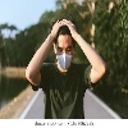

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.81176471, 0.90980392, 0.98823529],
        [0.80784314, 0.90588235, 0.98431373],
        [0.80784314, 0.90588235, 0.98431373],
        ...,
        [0.39215686, 0.44313725, 0.29411765],
        [0.14117647, 0.18823529, 0.03921569],
        [0.14509804, 0.19215686, 0.04313725]],

       [[0.81176471, 0.90980392, 0.98823529],
        [0.81176471, 0.90980392, 0.98823529],
        [0.81176471, 0.90980392, 0.98823529],
        ...,
        [0.37647059, 0.42352941, 0.27058824],
        [0.14901961, 0.19607843, 0.04313725],
        [0.21960784, 0.26666667, 0.11372549]],

       [[0.81176471, 0.90980392, 0.98823529],
        [0.81568627, 0.91372549, 0.99215686],
        [0.81568627, 0.91372549, 0.99215686],
        ...,
        [0.36470588, 0.40784314, 0.24705882],
        [0.20392157, 0.24705882, 0.09019608],
        [0.27058824, 0.31372549, 0.15294118]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - acc: 0.6996 - loss: 0.7351 - val_acc: 0.9058 - val_loss: 0.2352
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - acc: 0.8760 - loss: 0.3135 - val_acc: 0.8826 - val_loss: 0.2634
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9034 - loss: 0.2422 - val_acc: 0.9190 - val_loss: 0.2047
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9154 - loss: 0.2190 - val_acc: 0.9190 - val_loss: 0.2028
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9352 - loss: 0.1726 - val_acc: 0.9421 - val_loss: 0.1716


#**Model evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8990 - loss: 0.2725
Test Accuracy = 0.9060224890708923


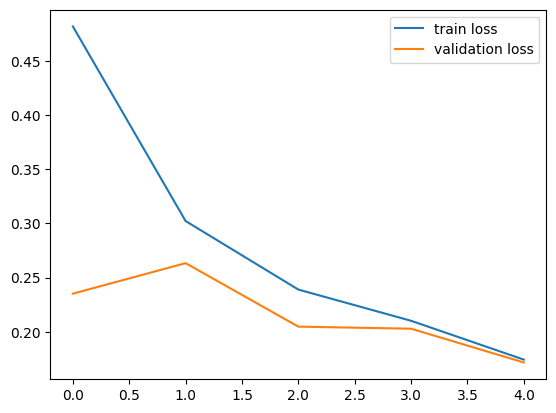

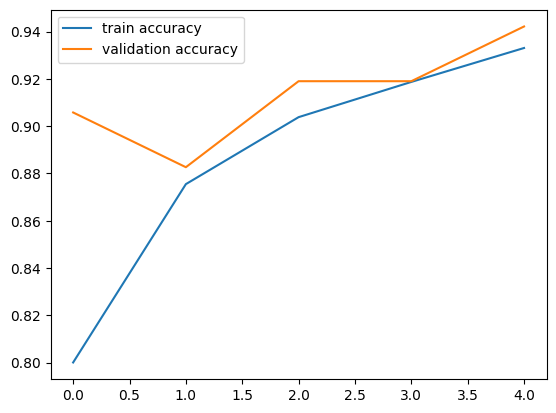

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1005.jpg


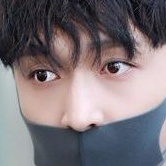

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step
[[0.27570742 0.6987292 ]]
1
The person in the image is wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_1009.jpg


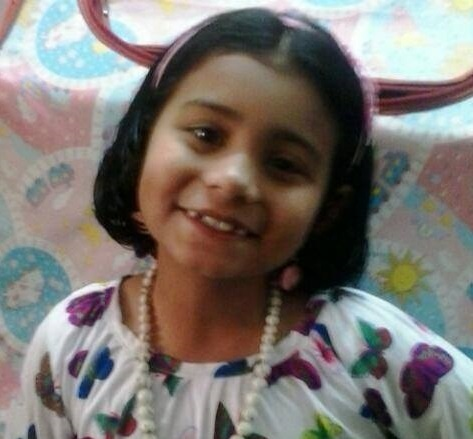

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.15611292 0.83057916]]
1
The person in the image is wearing a mask


In [40]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')